In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../data/smartwatches.csv')
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [3]:
df = df.rename(columns={'Current Price': 'Current_Price', 
                       'Original Price': 'Original_Price',
                       'Discount Percentage':'Discount_Percentage',
                       'Number OF Ratings': 'Number_of_Ratings',
                       'Model Name': 'Model_Name',
                       'Dial Shape': 'Dial_Shape',
                       'Strap Color': 'Strap_Color',
                       'Strap Material': 'Strap_Material',
                       'Battery Life (Days)': 'Battery_Life',
                       'Display Size': 'Display_Size'})

### Drop unnecessary columns

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
df.head()

,Brand,Current_Price,Original_Price,Discount_Percentage,Rating,Number_of_Ratings,Model_Name,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Battery_Life,Bluetooth,Display_Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


### Train Test Split

In [5]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
train_df.shape, test_df.shape

((360, 15), (90, 15))

In [6]:
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,Brand,Current_Price,Original_Price,Discount_Percentage,Rating,Number_of_Ratings,Model_Name,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Battery_Life,Bluetooth,Display_Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


### Steps only for dataset clean up (no relation with transformation)

In [7]:
train_df.isna().sum()

Brand                    0
Current_Price            6
Original_Price          56
Discount_Percentage     56
Rating                   4
Number_of_Ratings       45
Model_Name              30
Dial_Shape             100
Strap_Color            100
Strap_Material          56
Touchscreen             31
Battery_Life            30
Bluetooth                5
Display_Size            27
Weight                 149
dtype: int64

1. cleaning columns which are not spelled properly

In [8]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: count, dtype: int64

In [9]:
import re

def clean_weight(x):
    match = re.findall(r'\d+', x)
    int_match = list(map(float, match))
    return np.mean(int_match)

clean_weight('<= 20 g +')

np.float64(20.0)

In [10]:
train_df['Weight'] = train_df['Weight'].replace(np.nan, '0')
train_df['Weight'] = train_df['Weight'].map(clean_weight)
train_df['Weight'] = train_df['Weight'].replace(0.0, np.nan)

In [11]:
train_df['Weight'].value_counts()

Weight
27.5    63
75.0    58
42.5    45
20.0    30
62.5    15
Name: count, dtype: int64

In [12]:
def clean_display(x):
    match = re.findall(r'\d+.\d+', x)
    int_match = list(map(float, match))
    return int_match[0]

clean_display('209.9 inches')

209.9

In [13]:
train_df['Display_Size'] = train_df['Display_Size'].replace(np.nan, '0.0 inches')
train_df['Display_Size'] = train_df['Display_Size'].map(clean_display)
train_df['Display_Size'] = train_df['Display_Size'].replace(0.0, np.nan)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current_Price        354 non-null    float64
 2   Original_Price       304 non-null    float64
 3   Discount_Percentage  304 non-null    float64
 4   Rating               356 non-null    float64
 5   Number_of_Ratings    315 non-null    float64
 6   Model_Name           330 non-null    object 
 7   Dial_Shape           260 non-null    object 
 8   Strap_Color          260 non-null    object 
 9   Strap_Material       304 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery_Life         330 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display_Size         332 non-null    float64
 14  Weight               211 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

### Seperating Numerical and Categorical Data

In [15]:
categorical_columns = [column for column in train_df.columns if train_df[column].dtype=='O']
numerical_columns = [column for column in train_df.columns if train_df[column].dtype!='O']

In [16]:
print(categorical_columns, numerical_columns)

['Brand', 'Model_Name', 'Dial_Shape', 'Strap_Color', 'Strap_Material', 'Touchscreen', 'Bluetooth'] ['Current_Price', 'Original_Price', 'Discount_Percentage', 'Rating', 'Number_of_Ratings', 'Battery_Life', 'Display_Size', 'Weight']


In [17]:
train_df['Discount_Percentage'] = train_df['Discount_Percentage'].fillna(train_df['Discount_Percentage'].median())
train_df['Discount_Percentage'].isna().sum()

np.int64(0)

In [18]:
from scipy.stats import f_oneway

important_cat_columns = []
for column in categorical_columns:
    CategoryGroupLists = train_df.groupby(column)['Discount_Percentage'].apply(list)
    AnnovaResults = f_oneway(*CategoryGroupLists)
    print(f'{column} : P-Value for annova is: {AnnovaResults[1]}')
    if AnnovaResults[1]<0.6:
        important_cat_columns.append(column)

print(important_cat_columns)

Brand : P-Value for annova is: 6.171194473352673e-34
Model_Name : P-Value for annova is: 4.393415106356413e-14
Dial_Shape : P-Value for annova is: 4.0073280373016195e-07
Strap_Color : P-Value for annova is: 0.10000494475895344
Strap_Material : P-Value for annova is: 0.04880978958252567
Touchscreen : P-Value for annova is: 0.01999102393882811
Bluetooth : P-Value for annova is: 0.7604418079221616
['Brand', 'Model_Name', 'Dial_Shape', 'Strap_Color', 'Strap_Material', 'Touchscreen']


In [19]:
train_df['Discount_Percentage'].isnull().sum()

np.int64(0)

### Handling Numerical Column nan values

In [20]:
from category_encoders.target_encoder import TargetEncoder

# set up the encoder
encoder = TargetEncoder(cols=important_cat_columns)

# fit the encoder - finds the mean target value per category
encoder.fit(train_df[important_cat_columns], train_df['Discount_Percentage'])

TargetEncoder(cols=['Brand', 'Model_Name', 'Dial_Shape', 'Strap_Color',
                    'Strap_Material', 'Touchscreen'])

In [21]:
train_df.head()

,Brand,Current_Price,Original_Price,Discount_Percentage,Rating,Number_of_Ratings,Model_Name,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Battery_Life,Bluetooth,Display_Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9,75.0
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75.0
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6,NaN


In [22]:
train_df[important_cat_columns] = encoder.transform(train_df[important_cat_columns])
train_df.head()

,Brand,Current_Price,Original_Price,Discount_Percentage,Rating,Number_of_Ratings,Model_Name,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Battery_Life,Bluetooth,Display_Size,Weight
0,49.790929,2949.0,4199.0,29.768993,3.1,10.0,46.281029,46.281029,45.005102,47.658828,49.888997,NaN,Yes,2.7,NaN
1,63.081517,6999.0,15999.0,56.253516,2.6,NaN,49.726890,36.674199,45.154205,49.270411,49.888997,8.0,Yes,1.4,NaN
2,63.081517,2499.0,11999.0,79.173264,4.1,1990.0,53.066183,57.983551,57.983551,51.997999,49.888997,8.0,Yes,1.9,75.0
3,64.813050,1999.0,7990.0,74.981227,3.6,827.0,50.134322,57.983551,57.983551,51.997999,44.826914,8.0,Yes,NaN,75.0
4,63.081517,2299.0,5999.0,61.676946,2.5,24.0,50.584312,52.647405,49.572803,49.270411,49.888997,22.0,Yes,1.6,NaN


In [23]:
col1 = ['Current_Price', 'Original_Price', 'Rating', 'Number_of_Ratings', 'Battery_Life', 'Display_Size', 'Weight']
col2 = ['Brand', 'Dial_Shape', 'Strap_Color', 'Strap_Material', 'Touchscreen', 'Model_Name']
col = col1+col2
print(col)

['Current_Price', 'Original_Price', 'Rating', 'Number_of_Ratings', 'Battery_Life', 'Display_Size', 'Weight', 'Brand', 'Dial_Shape', 'Strap_Color', 'Strap_Material', 'Touchscreen', 'Model_Name']


In [24]:
Brand = 'noise'
Dial_Shape = ''
Strap_Color = 'red'
Strap_Material = 'other'
Touchscreen = 'yes'
Model_Name = 'Wrb-sw-colorfitpulsegobuzz-std-blk_blk'
Current_Price = 1599.0
Original_Price = 4999.0
Rating = 4.1
Number_of_Ratings = 13901.0
Battery_Life = 8.0
Display_Size = 1.7
Weight = 35.0

numerical_data = [Current_Price, Original_Price, Rating, Number_of_Ratings, Battery_Life, Display_Size, Weight]
categorical_data = [Brand, Dial_Shape, Strap_Color, Strap_Material, Touchscreen, Model_Name]
data = numerical_data + categorical_data
print(data)

[1599.0, 4999.0, 4.1, 13901.0, 8.0, 1.7, 35.0, 'noise', '', 'red', 'other', 'yes', 'Wrb-sw-colorfitpulsegobuzz-std-blk_blk']


In [72]:
df1 = pd.DataFrame(dict(zip(col, data)), index=[0])
df1

,Current_Price,Original_Price,Rating,Number_of_Ratings,Battery_Life,Display_Size,Weight,Brand,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Model_Name
0,1599.0,4999.0,4.1,13901.0,8.0,1.7,35.0,noise,,red,other,yes,Wrb-sw-colorfitpulsegobuzz-std-blk_blk


In [73]:
col2

['Brand',
 'Dial_Shape',
 'Strap_Color',
 'Strap_Material',
 'Touchscreen',
 'Model_Name']

In [74]:
df1[col2] = encoder.transform(df1[col2])
df1

,Current_Price,Original_Price,Rating,Number_of_Ratings,Battery_Life,Display_Size,Weight,Brand,Dial_Shape,Strap_Color,Strap_Material,Touchscreen,Model_Name
0,1599.0,4999.0,4.1,13901.0,8.0,1.7,35.0,58.768178,48.750712,48.750712,48.750712,48.750712,51.256977


In [75]:
import pickle
scalar = pickle.load(open(r'../app/src/models/scalar.pkl', "rb"))

In [76]:
[df1.loc[0].values]

[array([1.59900000e+03, 4.99900000e+03, 4.10000000e+00, 1.39010000e+04,
        8.00000000e+00, 1.70000000e+00, 3.50000000e+01, 5.87681783e+01,
        4.87507116e+01, 4.87507116e+01, 4.87507116e+01, 4.87507116e+01,
        5.12569770e+01])]

In [77]:
df1.values

array([[1.59900000e+03, 4.99900000e+03, 4.10000000e+00, 1.39010000e+04,
        8.00000000e+00, 1.70000000e+00, 3.50000000e+01, 5.87681783e+01,
        4.87507116e+01, 4.87507116e+01, 4.87507116e+01, 4.87507116e+01,
        5.12569770e+01]])

In [78]:
df_scaled = scalar.transform([df1.loc[0].values])
df_scaled

c:\Users\dasna\anaconda3\envs\mldl_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.60425736, -0.57278   ,  0.09905786,  0.14811632, -0.77749298,
        -0.11105794, -0.52519372,  0.99194299,  0.01964593, -0.02178334,
        -0.40448459, -0.08098561,  1.84259872]])

In [80]:
model = pickle.load(open(r'../app/src/models/best_model.pkl', "rb"))

In [82]:
model.predict(df_scaled)[0]

np.float64(50.34755435145347)

In [24]:
all_columns = numerical_columns + important_cat_columns
train_df[all_columns].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen
0,2949.0,4199.0,29.768993,3.1,10.0,NaN,2.7,NaN,49.790929,46.281029,46.281029,45.005102,47.658828,49.888997
1,6999.0,15999.0,56.253516,2.6,NaN,8.0,1.4,NaN,63.081517,49.726890,36.674199,45.154205,49.270411,49.888997
2,2499.0,11999.0,79.173264,4.1,1990.0,8.0,1.9,75.0,63.081517,53.066183,57.983551,57.983551,51.997999,49.888997
3,1999.0,7990.0,74.981227,3.6,827.0,8.0,NaN,75.0,64.813050,50.134322,57.983551,57.983551,51.997999,44.826914
4,2299.0,5999.0,61.676946,2.5,24.0,22.0,1.6,NaN,63.081517,50.584312,52.647405,49.572803,49.270411,49.888997


In [25]:
train_df[numerical_columns].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,2949.0,4199.0,29.768993,3.1,10.0,NaN,2.7,NaN
1,6999.0,15999.0,56.253516,2.6,NaN,8.0,1.4,NaN
2,2499.0,11999.0,79.173264,4.1,1990.0,8.0,1.9,75.0
3,1999.0,7990.0,74.981227,3.6,827.0,8.0,NaN,75.0
4,2299.0,5999.0,61.676946,2.5,24.0,22.0,1.6,NaN


In [16]:
train_df[numerical_columns].isna().sum()

Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Battery Life (Days)     30
Display Size            28
Weight                 149
dtype: int64

In [17]:
num_nan_dict = train_df[numerical_columns].median().to_dict()
num_nan_dict

{'Current Price': 3999.0,
 'Original Price': 7994.5,
 'Discount Percentage': 53.06840758,
 'Rating': 4.1,
 'Number OF Ratings': 830.0,
 'Battery Life (Days)': 17.5,
 'Display Size': 1.6,
 'Weight': 42.5}

Fill all NAN values with median

In [18]:
for column in numerical_columns:
    train_df[column] = train_df[column].replace(np.nan, train_df[column].median())

train_df[numerical_columns].isna().sum()

Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

### Handling Categorical column nan values

In [19]:
train_df[categorical_columns].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,zebronics,LEATHER fit-650,Oval,Black,Leather,Yes,Yes
1,fire-boltt,bsw020,Circle,Brown,Silicon,Yes,Yes
2,fire-boltt,BSW070,NaN,NaN,NaN,Yes,Yes
3,boat,NaN,NaN,NaN,NaN,NaN,Yes
4,fire-boltt,NINJA PRO MAX,Square,Blue,Silicon,Yes,Yes


In [20]:
train_df[categorical_columns].isna().sum()

Brand               0
Model Name         30
Dial Shape        100
Strap Color       100
Strap Material     56
Touchscreen        31
Bluetooth           5
dtype: int64

In [21]:
for column in categorical_columns:
    train_df[column] = train_df[column].replace(np.nan, train_df[column].mode()[0])

train_df[categorical_columns].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Color       0
Strap Material    0
Touchscreen       0
Bluetooth         0
dtype: int64

In [22]:
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,17.5,Yes,2.7,42.5
1,fire-boltt,6999.0,15999.0,56.253516,2.6,830.0,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4,42.5
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,Circle,Black,Silicon,Yes,8.0,Yes,1.9,75.0
3,boat,1999.0,7990.0,74.981227,3.6,827.0,beast pro,Circle,Black,Silicon,Yes,8.0,Yes,1.6,75.0
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6,42.5


# EDA & Feature Engineering for the data

## 1. Numerical Data

In [23]:
train_df[numerical_columns].head()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,2949.0,4199.0,29.768993,3.1,10.0,17.5,2.7,42.5
1,6999.0,15999.0,56.253516,2.6,830.0,8.0,1.4,42.5
2,2499.0,11999.0,79.173264,4.1,1990.0,8.0,1.9,75.0
3,1999.0,7990.0,74.981227,3.6,827.0,8.0,1.6,75.0
4,2299.0,5999.0,61.676946,2.5,24.0,22.0,1.6,42.5


### Check closely correlated features

In [24]:
corr_df = train_df[numerical_columns].corr()
corr_df

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
Current Price,1.000000,0.679993,-0.433901,0.387388,-0.173892,0.019897,-0.007082,-0.246103
Original Price,0.679993,1.000000,-0.484785,0.242310,-0.135492,-0.123057,0.006243,-0.087098
Discount Percentage,-0.433901,-0.484785,1.000000,-0.145370,0.212577,-0.003233,-0.017324,0.134211
Rating,0.387388,0.242310,-0.145370,1.000000,0.083445,-0.110881,0.103388,-0.172649
Number OF Ratings,-0.173892,-0.135492,0.212577,0.083445,1.000000,-0.013775,-0.023755,0.049004
Battery Life (Days),0.019897,-0.123057,-0.003233,-0.110881,-0.013775,1.000000,0.014740,-0.126159
Display Size,-0.007082,0.006243,-0.017324,0.103388,-0.023755,0.014740,1.000000,-0.008290
Weight,-0.246103,-0.087098,0.134211,-0.172649,0.049004,-0.126159,-0.008290,1.000000


<Axes: >

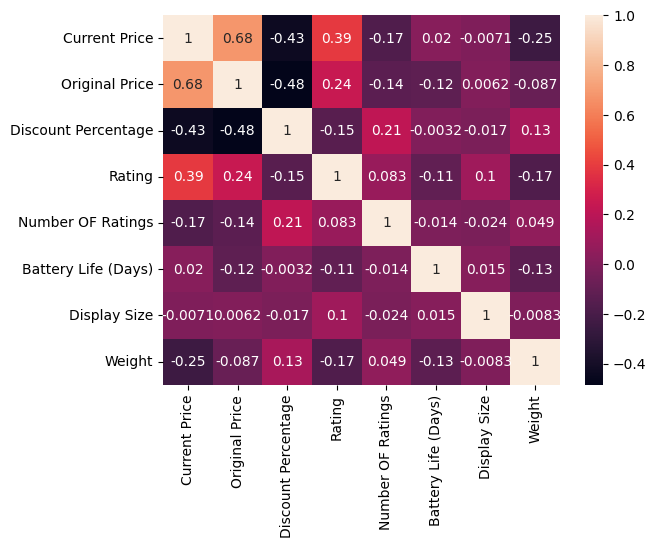

In [25]:
sns.heatmap(train_df[numerical_columns].corr(), annot=True)

### - We see that there is no features which are closely correlated so we will avoid removing any features

## Check Skewness of the numerical data

In [26]:
train_df[numerical_columns].skew()

Current Price          2.329566
Original Price         3.053360
Discount Percentage   -1.162599
Rating                -1.601779
Number OF Ratings      5.840459
Battery Life (Days)   -0.299398
Display Size           8.709602
Weight                 0.710420
dtype: float64

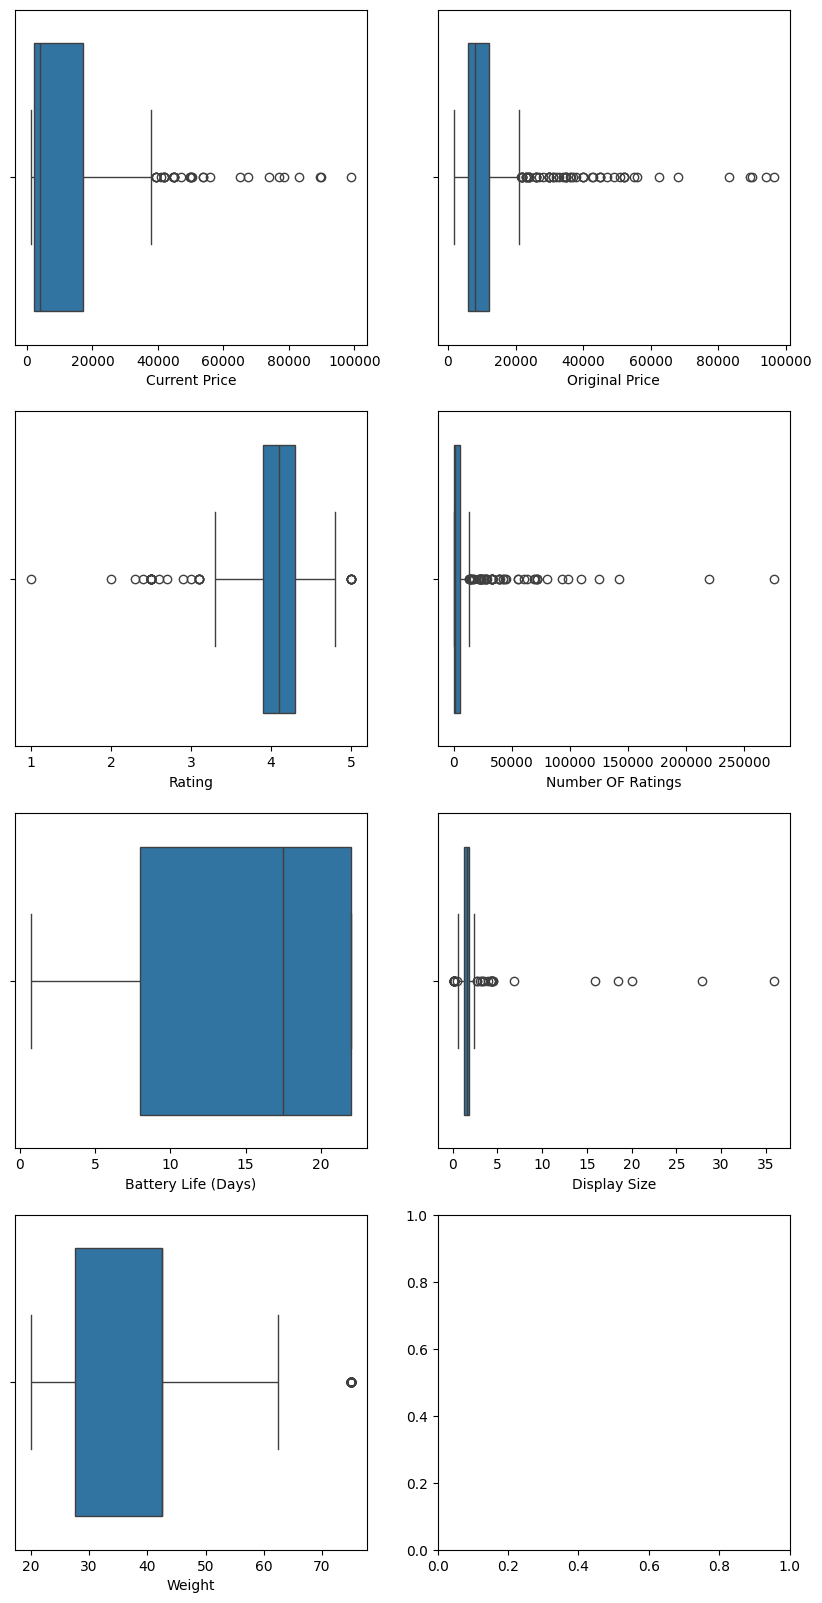

In [27]:
Columns = [column for column in train_df.columns if train_df[column].dtype!='O']
Columns.remove('Discount Percentage')
plt.subplots(4, 2, figsize=(10,20))

for row, column in enumerate(Columns, start=1):
    plt.subplot(4,2, row)
    sns.boxplot(data=train_df[column], orient='h')


### Here in our case the data is already low so we will not remove outliers

## Check correlation in categorical columns

In [28]:
from scipy.stats import f_oneway

important_cat_columns = []
for column in categorical_columns:
    CategoryGroupLists = train_df.groupby(column)['Discount Percentage'].apply(list)
    AnnovaResults = f_oneway(*CategoryGroupLists)
    print(f'{column} : P-Value for annova is: {AnnovaResults[1]}')
    if AnnovaResults[1]<0.7:
        important_cat_columns.append(column)

print(important_cat_columns)

Brand : P-Value for annova is: 6.171194473352673e-34
Model Name : P-Value for annova is: 0.7716120811410285
Dial Shape : P-Value for annova is: 0.3624401103882224
Strap Color : P-Value for annova is: 0.17488786421099906
Strap Material : P-Value for annova is: 0.08101092793787787
Touchscreen : P-Value for annova is: 0.03495451239443219
Bluetooth : P-Value for annova is: 0.7419875383336109
['Brand', 'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen']


In [29]:
train_df[important_cat_columns].head()

,Brand,Dial Shape,Strap Color,Strap Material,Touchscreen
0,zebronics,Oval,Black,Leather,Yes
1,fire-boltt,Circle,Brown,Silicon,Yes
2,fire-boltt,Circle,Black,Silicon,Yes
3,boat,Circle,Black,Silicon,Yes
4,fire-boltt,Square,Blue,Silicon,Yes


In [30]:
important_columns = important_cat_columns + numerical_columns
important_columns

['Brand',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight']

In [31]:
train_df[important_columns].head()

,Brand,Dial Shape,Strap Color,Strap Material,Touchscreen,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,zebronics,Oval,Black,Leather,Yes,2949.0,4199.0,29.768993,3.1,10.0,17.5,2.7,42.5
1,fire-boltt,Circle,Brown,Silicon,Yes,6999.0,15999.0,56.253516,2.6,830.0,8.0,1.4,42.5
2,fire-boltt,Circle,Black,Silicon,Yes,2499.0,11999.0,79.173264,4.1,1990.0,8.0,1.9,75.0
3,boat,Circle,Black,Silicon,Yes,1999.0,7990.0,74.981227,3.6,827.0,8.0,1.6,75.0
4,fire-boltt,Square,Blue,Silicon,Yes,2299.0,5999.0,61.676946,2.5,24.0,22.0,1.6,42.5


In [32]:
train_df[important_cat_columns].head()

,Brand,Dial Shape,Strap Color,Strap Material,Touchscreen
0,zebronics,Oval,Black,Leather,Yes
1,fire-boltt,Circle,Brown,Silicon,Yes
2,fire-boltt,Circle,Black,Silicon,Yes
3,boat,Circle,Black,Silicon,Yes
4,fire-boltt,Square,Blue,Silicon,Yes


In [33]:
# for column in important_cat_columns:
#     target_mean = train_df[important_columns].groupby(column)['Discount Percentage'].mean()
#     train_df[column] = train_df[column].map(target_mean)

# train_df[important_cat_columns].head()

## Dependent & Independent feature seperation

In [34]:
important_columns.remove('Discount Percentage')
X_train = train_df[important_columns]
y_train = train_df['Discount Percentage']
X_train.head()

,Brand,Dial Shape,Strap Color,Strap Material,Touchscreen,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,zebronics,Oval,Black,Leather,Yes,2949.0,4199.0,3.1,10.0,17.5,2.7,42.5
1,fire-boltt,Circle,Brown,Silicon,Yes,6999.0,15999.0,2.6,830.0,8.0,1.4,42.5
2,fire-boltt,Circle,Black,Silicon,Yes,2499.0,11999.0,4.1,1990.0,8.0,1.9,75.0
3,boat,Circle,Black,Silicon,Yes,1999.0,7990.0,3.6,827.0,8.0,1.6,75.0
4,fire-boltt,Square,Blue,Silicon,Yes,2299.0,5999.0,2.5,24.0,22.0,1.6,42.5


In [56]:
from category_encoders.target_encoder import TargetEncoder

# set up the encoder
encoder = TargetEncoder(cols=categorical_columns)

# fit the encoder - finds the mean target value per category
encoder.fit(train_df[categorical_columns], train_df['Discount Percentage'])

TargetEncoder(cols=['Brand', 'Model Name', 'Dial Shape', 'Strap Color',
                    'Strap Material', 'Touchscreen', 'Bluetooth'])

In [58]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,17.5,Yes,2.7,42.5
1,fire-boltt,6999.0,15999.0,56.253516,2.6,830.0,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4,42.5
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,Circle,Black,Silicon,Yes,8.0,Yes,1.9,75.0
3,boat,1999.0,7990.0,74.981227,3.6,827.0,beast pro,Circle,Black,Silicon,Yes,8.0,Yes,1.6,75.0
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6,42.5


In [60]:
encoder.transform(X_train[categorical_columns])

KeyError: "['Model Name', 'Bluetooth'] not in index"

In [42]:
categorical_columns

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']